<center><b>Układ Lorenza:</b></center>

$$ \frac{dx}{dt} = \sigma (y - x) $$

$$ \frac{dy}{dt} = x (\rho - z) - y $$

$$ \frac{dz}{dt} = x y - \beta z $$



In [14]:
%matplotlib inline

import numpy as np, matplotlib.pyplot as plt, matplotlib.font_manager as fm, os
from scipy.integrate import odeint
from mpl_toolkits.mplot3d.axes3d import Axes3D

In [15]:
title_font = fm.FontProperties(family="Sans", style='normal', size=20, weight='normal', stretch='normal')

In [16]:
# stan początkowy
initial_state = [0.1, 0, 0]

# stałe
sigma = 10.
rho   = 28.
beta  = 8./3.

start_time = 0
end_time = 100
time_points = np.linspace(start_time, end_time, end_time*100)

In [17]:
# funkcja określająca układ Lorenza

def lorenz_system(current_state, t):
    
    x, y, z = current_state
    
    dx_dt = sigma * (y - x)
    dy_dt = x * (rho - z) - y
    dz_dt = x * y - beta * z
    
    return [dx_dt, dy_dt, dz_dt]

In [18]:
# część odpowiedzialna za rozwiązanie ukłądu różniczkowego
xyz = odeint(lorenz_system, initial_state, time_points)

x = xyz[:, 0]
y = xyz[:, 1]
z = xyz[:, 2]

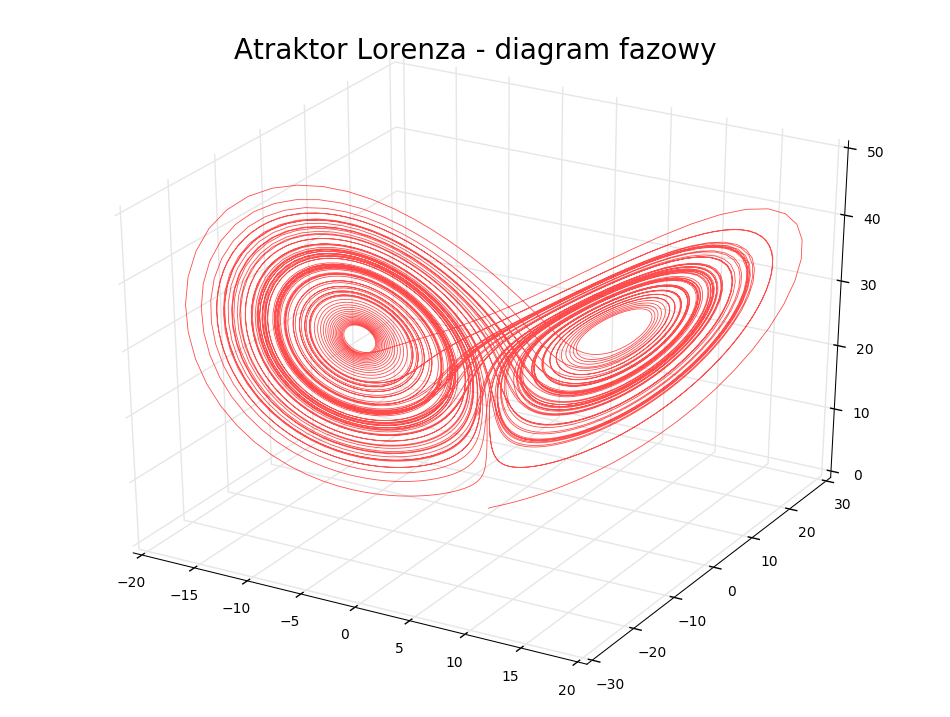

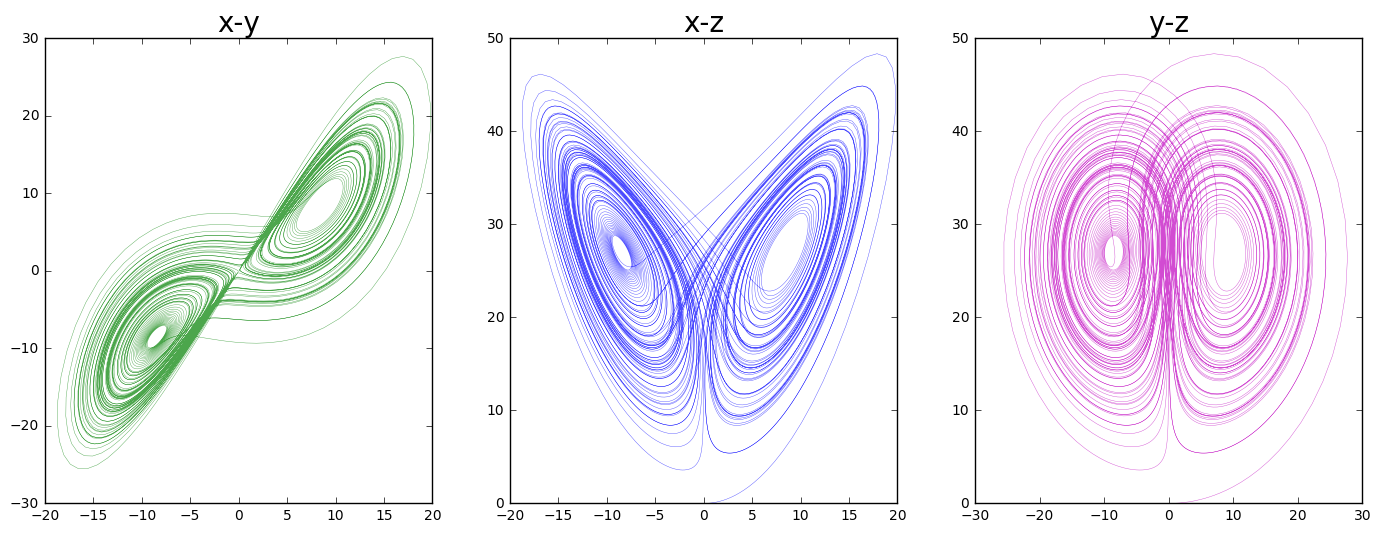

In [19]:
# 3D

fig = plt.figure(figsize=(12, 9))
ax = fig.gca(projection='3d')
ax.xaxis.set_pane_color((1,1,1,1))
ax.yaxis.set_pane_color((1,1,1,1))
ax.zaxis.set_pane_color((1,1,1,1))
ax.plot(x, y, z, color='r', alpha=0.7, linewidth=0.6)
ax.set_title('Atraktor Lorenza - diagram fazowy', fontproperties=title_font)

plt.show()

#2D
fig, ax = plt.subplots(1, 3, sharex=False, sharey=False, figsize=(17, 6))

ax[0].plot(x, y, color='g', alpha=0.7, linewidth=0.3)
ax[0].set_title('x-y', fontproperties=title_font)

ax[1].plot(x, z, color='b', alpha=0.7, linewidth=0.3)
ax[1].set_title('x-z', fontproperties=title_font)

ax[2].plot(y, z, color='m', alpha=0.7, linewidth=0.3)
ax[2].set_title('y-z', fontproperties=title_font)

plt.show()